In [2]:
%pwd

'/home/raff/coding/switchnode-ui/greenhorn/scripts'

In [29]:
import json
import matplotlib.pyplot as plt

with open('../../bench.json') as f:
    data = json.load(f)

In [37]:
class Histogram(object):
    
    @classmethod
    def from_json(cls, d):
        ret = cls()
        ret.max = d['max']
        ret.min = d['min']
        ret.mean = d['mean']
        ret.len = d['len']
        ret.quantiles = d['quantiles']
        return ret
    
    def plot(self, subplot):
        width = self.max / len(self.quantiles)
        for (x,q,y) in self.quantiles:
            x = x - width / 2
            subplot.bar(x,y,width=width)

class ComponentMetric(object):
    
    @classmethod
    def from_json(cls, d):
        ret = cls()
        ret.time = Histogram.from_json(d['time']['hist'])
        ret.throughput = Histogram.from_json(d['throughput']['hist'])
        return ret

class Benchmark(object):
    
    @classmethod
    def from_json(cls, d):
        ret = cls()
        ret.components = None
        ret.root = ComponentMetric.from_json(d['root'])
        ret.diff = Histogram.from_json(d['diff']['hist'])
        ret.empty_patch = Histogram.from_json(d['empty_patch']['hist'])
        return ret

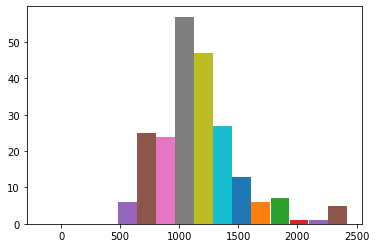

In [38]:
bench = Benchmark.from_json(data)
fig = plt.figure()
bench.root.time.plot(fig.add_subplot(1,1, 1))

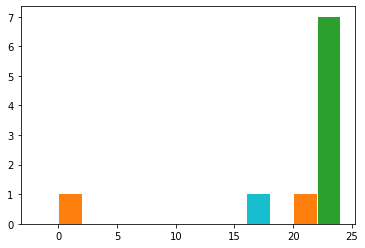

In [39]:
bench = Benchmark.from_json(data)
fig = plt.figure()
bench.root.throughput.plot(fig.add_subplot(1,1, 1))

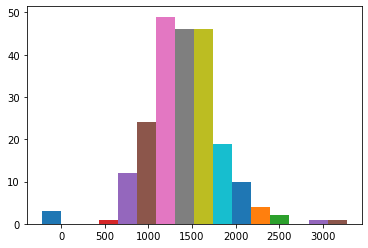

In [42]:
bench = Benchmark.from_json(data)
fig = plt.figure()
bench.diff.plot(fig.add_subplot(1,1, 1))

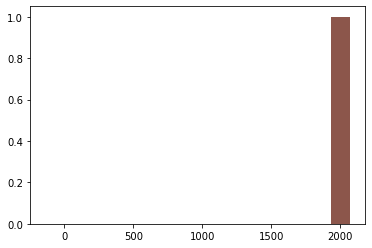

In [43]:
bench = Benchmark.from_json(data)
fig = plt.figure()
bench.empty_patch.plot(fig.add_subplot(1,1, 1))

In [37]:
fig.add_subplot?